# Anim·E 

https://github.com/cccntu/anim_e

In [ ]:
! nvidia-smi
! pip install git+https://github.com/cccntu/anim_e.git

In [3]:
# this take a few minutes to initialize
dtype = "float32" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from anim_e.colab import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


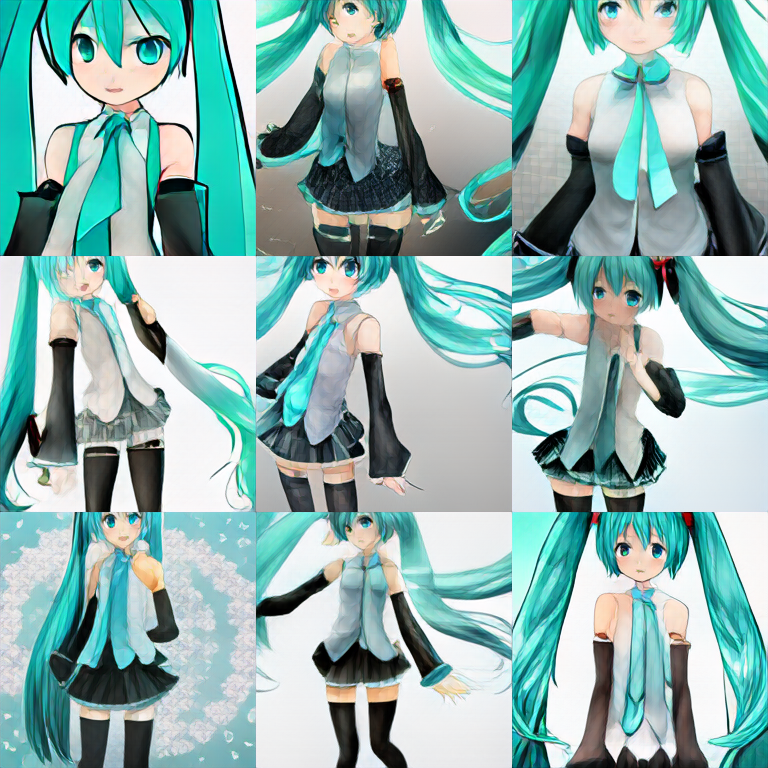

CPU times: user 58 s, sys: 1.58 s, total: 59.6 s
Wall time: 59.9 s


In [5]:
%%time

text = "Hatsune Miku" #@param {type:"string"}
progressive_outputs = True #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
temperature = 1 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 10 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text=text,
    seed=1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False